In [2]:
import os
import matplotlib.pyplot as plt
%pylab inline
import numpy as np
# from lasagne.layers import DenseLayer
# from lasagne.layers import InputLayer
# from lasagne.layers import DropoutLayer
# from lasagne.layers import Conv2DLayer
# from lasagne.layers import MaxPool2DLayer
# from lasagne.nonlinearities import softmax
# from lasagne.updates import adam
# from lasagne.layers import get_all_params
# import theano as T
# from nolearn.lasagne import NeuralNet
# from nolearn.lasagne import TrainSplit
# from nolearn.lasagne import objective
import gc
import pandas




/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Populating the interactive namespace from numpy and matplotlib


In [3]:
imagewidth = 40
def display(image, min = 0.0, max = 1.0):
    plt.imshow(image, cmap = plt.get_cmap('gray'), interpolation='nearest')
    plt.show()
    

def load_data(path):
    print("loading...")
    gc.collect() # collect garbage
    data = pandas.read_hdf(path, '/df')
    df = pandas.DataFrame(data)
    data_dict = {}
    for label in set(df._get_numeric_data().columns).union({'hcad'}):
        # union hcad to ensure that hcad col comes in even if not considered numerical
        # if label != 'hcad':
        data_dict[label] = df[label].astype(float)
        # df[label][df[label] > 1] = 1.0

    # df['hcad'] = df['hcad'].astype(float)
    result = pandas.DataFrame.from_dict(data_dict)

    result = result.replace([np.inf, -np.inf], 1)
    
    return result.sort(['hcad']).fillna(0)

In [4]:
mat = np.zeros([870476, 256])
for i in range(88):
    piece = np.load("/home/isaac/Desktop/devika/final_model_inputs/compressed_terrain_"+str(i)+".npy")
    mat[i*10000: i*10000 + len(piece)] = piece
    

In [5]:
print mat.shape

(870476, 256)


In [6]:
# from sklearn.cluster import KMeans
# from sklearn.decomposition import PCA
# from sklearn import metrics

# # for i in range(2,1000):
# kmeans = KMeans(init='k-means++', n_clusters = 3)
# kmeans.fit(mat)



In [7]:

a = kmeans.labels_
b = np.zeros((a.size, a.max()+1))
b[np.arange(len(mat)), a] = 1
print b
print b.shape

NameError: name 'kmeans' is not defined

In [8]:
hcad = load_data("/home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd")
wind_data = load_data("/home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad100_hist8x8.mat.hd")
y_data = load_data("/home/isaac/Dropbox/data_for_brian/y_df.hd")

loading...
Opening /home/isaac/Dropbox/data_for_brian/hcad_features/hcad_df_200.hd in read-only mode
loading...
Opening /home/isaac/Dropbox/data_for_brian/wind_features/hcad_interp_withoutpartial_rad100_hist8x8.mat.hd in read-only mode
loading...
Opening /home/isaac/Dropbox/data_for_brian/y_df.hd in read-only mode


In [9]:
print wind_data.columns
speed_names = [
    u'intp_spd0',
    u'intp_spd1',
    u'intp_spd2',
    u'intp_spd3',
    u'intp_spd4',
    u'intp_spd5',
    u'intp_spd6',
    u'intp_spd7',
    u'intp_spd8',
    u'intp_spd9',

]
wind_maxes = np.array(wind_data[speed_names].max(axis=1)).reshape(-1, 1)
print wind_maxes

Index([u'hcad', u'hist0', u'hist1', u'hist10', u'hist11', u'hist12', u'hist13', u'hist14', u'hist15', u'hist16', u'hist17', u'hist18', u'hist19', u'hist2', u'hist20', u'hist21', u'hist22', u'hist23', u'hist24', u'hist25', u'hist26', u'hist27', u'hist28', u'hist29', u'hist3', u'hist30', u'hist31', u'hist32', u'hist33', u'hist34', u'hist35', u'hist36', u'hist37', u'hist38', u'hist39', u'hist4', u'hist40', u'hist41', u'hist42', u'hist43', u'hist44', u'hist45', u'hist46', u'hist47', u'hist48', u'hist49', u'hist5', u'hist50', u'hist51', u'hist52', u'hist53', u'hist54', u'hist55', u'hist56', u'hist57', u'hist58', u'hist59', u'hist6', u'hist60', u'hist61', u'hist62', u'hist63', u'hist7', u'hist8', u'hist9', u'intp_dir0', u'intp_dir1', u'intp_dir10', u'intp_dir2', u'intp_dir3', u'intp_dir4', u'intp_dir5', u'intp_dir6', u'intp_dir7', u'intp_dir8', u'intp_dir9', u'intp_spd0', u'intp_spd1', u'intp_spd10', u'intp_spd2', u'intp_spd3', u'intp_spd4', u'intp_spd5', u'intp_spd6', u'intp_spd7', u'intp_s

In [10]:
# load hidden layer acitvations of hcad data
hcad_1d = np.load("/home/isaac/Desktop/devika/gitignored/autoencoder_hidden_activations.npy")
print hcad_1d
print np.max(hcad_1d), np.min(hcad_1d)

[[ 0.30002004]
 [ 0.30002591]
 [ 0.29971594]
 ..., 
 [ 0.0959446 ]
 [ 0.053092  ]
 [ 0.05290391]]
0.300026 0.0486294


In [11]:
mat = mat / np.max(mat)
print np.array(wind_data.shape)
trY = np.array(y_data['y100_mean']).astype(np.float32)
trX = np.concatenate ((np.array(mat).astype(np.float32),
                     np.array(wind_data)/np.max([-np.min(wind_data),np.max(wind_data)]),
                    hcad_1d), axis = 1)
# x = np.concatenate ((b.astype(np.float32), np.array(wind_data)/np.max([-np.min(wind_data),np.max(wind_data)])), axis = 1)
# x = np.concatenate ((b.astype(np.float32), wind_maxes, hcad_1d), axis = 1)

# x = np.concatenate((x, wind_maxes), axis = 1)
trX = trX.astype(np.float32)

print trY
print trX.shape

[870476     89]
[ 0.  0.  0. ...,  0.  0.  0.]
(870476, 346)


In [16]:
print np.max(mat)

1.0


In [18]:
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet




net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('hidden', layers.DenseLayer),
            ('hidden2', layers.DenseLayer),
            ('output', layers.DenseLayer),
            ],
    # layer parameters:
    input_shape=(None, 346),
    hidden_num_units=50,  # number of units in 'hidden' layer
     hidden_nonlinearity = lasagne.nonlinearities.rectify,
    hidden2_num_units=20,  # number of units in 'hidden' layer
    hidden2_nonlinearity=lasagne.nonlinearities.rectify,

    output_nonlinearity=lasagne.nonlinearities.sigmoid,
    output_num_units=1, 

    # optimization method:
    update=nesterov_momentum,
    update_learning_rate=.01,
    update_momentum=0.9,

    max_epochs=300,
    verbose=1,
     regression=True,
#     objective_loss_function = lasagne.objectives.squared_error,
#     allow_input_downcast=True
    )
net1.initialize()
    # Train the network
print("training...")

net1.fit(x, y)

#record val loss: 0.13931

training...
# Neural Network with 18391 learnable parameters

## Layer information

  #  name       size
---  -------  ------
  0  input       346
  1  hidden       50
  2  hidden2      20
  3  output        1

  epoch    train loss    valid loss    train/val  dur
-------  ------------  ------------  -----------  -----
      1       0.09894       0.17265      0.57307  3.79s
      2       0.09904       0.17265      0.57366  3.74s
      3       0.09906       0.17235      0.57475  3.74s
      4       0.09910       0.17192      0.57640  3.74s
      5       0.09914       0.17129      0.57881  3.74s
      6       0.09918       0.17062      0.58131  3.74s
      7       0.09923       0.16995      0.58387  3.74s
      8       0.09927       0.16925      0.58654  3.75s
      9       0.09931       0.16856      0.58918  3.76s
     10       0.09935       0.16797      0.59146  3.76s
     11       0.09938       0.16726      0.59420  3.76s
     12       0.09935       0.16702      0.59486  3.75s
     13

NeuralNet(X_tensor_type=None,
     batch_iterator_test=<nolearn.lasagne.base.BatchIterator object at 0x7f953b4f0b90>,
     batch_iterator_train=<nolearn.lasagne.base.BatchIterator object at 0x7f953b4f0a50>,
     check_input=True, custom_scores=None,
     hidden2_nonlinearity=<function rectify at 0x7f953c600938>,
     hidden2_num_units=20,
     hidden_nonlinearity=<function rectify at 0x7f953c600938>,
     hidden_num_units=50, input_shape=(None, 346),
     layers=[('input', <class 'lasagne.layers.input.InputLayer'>), ('hidden', <class 'lasagne.layers.dense.DenseLayer'>), ('hidden2', <class 'lasagne.layers.dense.DenseLayer'>), ('output', <class 'lasagne.layers.dense.DenseLayer'>)],
     loss=None, max_epochs=300, more_params={},
     objective=<function objective at 0x7f953b4fa1b8>,
     objective_loss_function=<function squared_error at 0x7f953c0545f0>,
     on_batch_finished=[],
     on_epoch_finished=[<nolearn.lasagne.handlers.PrintLog instance at 0x7f940140a0e0>],
     on_training_fi

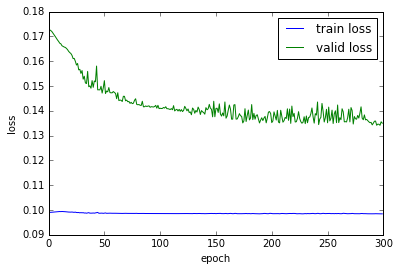

In [19]:
from nolearn.lasagne.visualize import plot_loss

plot_loss(net1)
plt.show()


In [20]:
META = load_data("/home/isaac/Dropbox/data_for_brian/meta/df_meta.hd")

loading...
Opening /home/isaac/Dropbox/data_for_brian/meta/df_meta.hd in read-only mode


In [21]:
from collections import defaultdict

def old_fast_show_ratio_plot(xy_points, y_data, log = False, normalize_buckets=True):
    if log:
        y_data = np.log(y_data)
    fig = plt.figure(frameon=False)
    fig.set_size_inches(3,3)
    plt.hist(y_data)
    plt.show()

    buckets = defaultdict(list)
    resolution = 200
    x = np.array(xy_points['x'])
    y = np.array(xy_points['y'])
    H, xedges, yedges = numpy.histogram2d(x,y, bins=resolution, weights = y_data)
    H_nums, dummy2, dummy1 = numpy.histogram2d(x,y, bins=resolution)
    plt.show()
    fig = plt.figure(frameon=False)
    fig.set_size_inches(12,12)
    if normalize_buckets:
        H=H/H_nums
    H[H_nums == 0.0] = numpy.nan
#     if log:
#         H = np.log(H)


    plt.imshow(H,
               interpolation='nearest', cmap=cm.gist_rainbow)#, vmin = 0, vmax = 1)
    plt.colorbar()
    plt.show()
    return np.nan_to_num(H)


def plot_on_map(pddf, meta = META):
    for col in pddf.columns:
        print("\n\n\n",col)
        xy = pandas.DataFrame.from_dict({'x': -meta['pointx'],'y': meta['pointy']})
        print("linear plot")
        old_fast_show_ratio_plot(xy,np.array(pddf[col]))
#         print("log plot")
#         old_fast_show_ratio_plot(xy,np.array(pddf[col]), log = True)
#         colored_scatter(xy,np.array(pddf[col]))




In [ ]:
output = lasagne.layers.get_output(net1.get_all_layers()[-1], x).eval()
print output
# np.save("/home/isaac/Desktop/devika/gitignored/autoencoder_hidden_activations", hidden_activations)

plt.hist(y, bins = 100, label = "actual damage")
plt.show()
plt.hist(output, bins = 100, label = "predicted damage")
plt.show()

plot_on_map(pandas.DataFrame.from_dict({"x": y - output.T[0]}))
plot_on_map(pandas.DataFrame.from_dict({"x": output.T[0]}))
plot_on_map(pandas.DataFrame.from_dict({"x": y}))




In [ ]:
print "hi"

In [27]:
'''
A Multilayer Perceptron implementation example using TensorFlow library.
This example is using the MNIST database of handwritten digits
(http://yann.lecun.com/exdb/mnist/)

Author: Aymeric Damien
Project: https://github.com/aymericdamien/TensorFlow-Examples/
'''
print "hi"

import tensorflow as tf
print trX.shape
print trY.shape

trX = trX.astype(np.float32)
trY = trY.astype(np.float32).reshape(-1, 1)


# Parameters
learning_rate = 0.01
training_epochs = 1
batch_size = 30
display_step = 15

# Network Parameters
n_hidden_1 = 20 # 1st layer number of features
n_hidden_2 = 22 # 2nd layer number of features
n_input = trX.shape[1] # MNIST data input (img shape: 28*28)

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, 1])


# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    out_layer = tf.nn.sigmoid(out_layer)
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, 1]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([1]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.square((pred - y)))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.initialize_all_variables()
sess = tf.Session()
# Launch the graph
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    avg_cost = 0.
    total_batch = int(len(trX)/batch_size)
    # Loop over all batches
    for start, end in zip(range(0, len(trX), batch_size), range(batch_size, len(trX), batch_size)):
#             sess.run(train_op, feed_dict={X: trX[start:end], Y: trY[start:end]})
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, cost], feed_dict={x: trX[start:end],
                                                      y: trY[start:end]})
        # Compute average loss
        avg_cost += c / total_batch
    # Display logs per epoch step
    if epoch % display_step == 0:
        print "Epoch:", '%04d' % (epoch+1), "cost=", \
            "{:.9f}".format(avg_cost)
print "Optimization Finished!"

# Test model
# correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
# print "Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels})

hi
(870476, 346)
(870476, 1)
Epoch: 0001 cost= 0.113388459
Optimization Finished!


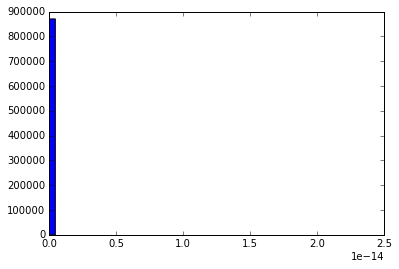

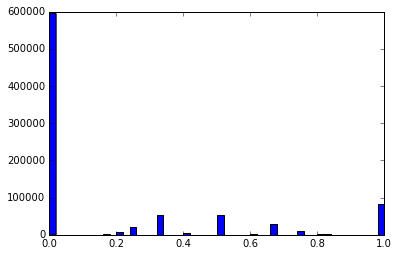

In [26]:
predictions = sess.run(pred, feed_dict = {x : trX, y:trY})
plt.hist(predictions, bins = 50)
plt.show()

plt.hist(trY.reshape(-1), bins = 50)
plt.show()